In [51]:
import networkx as nx
import osmnx as ox
import numpy as np
import requests
import pandas as pd
pd.options.display.max_rows = 6500
import matplotlib.cm as plt
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

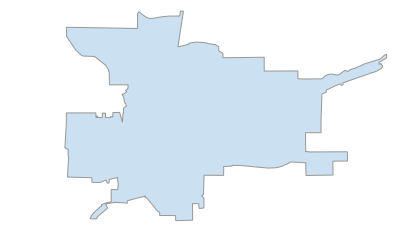

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x244cd389c50>)

In [2]:
city= ox.gdf_from_place('Pullman, Washington')
ox.plot_shape(ox.project_gdf(city))

### Walking map of Pullman

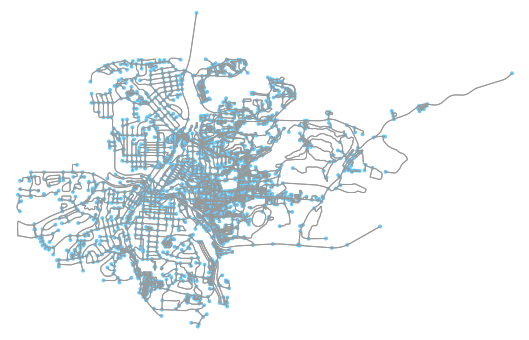

Pullman, Washington, USA


In [3]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='walk')
fig, ax = ox.plot_graph(G)
print(G)

### Driving Map of Pullman

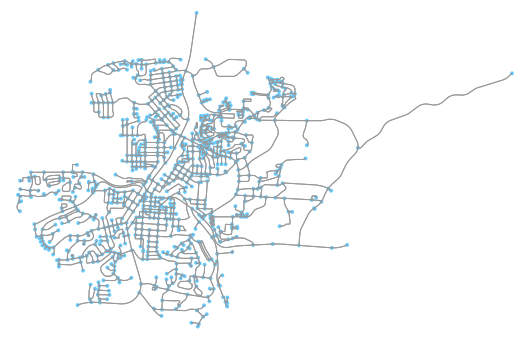

In [4]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

### Bike map of Pullman 

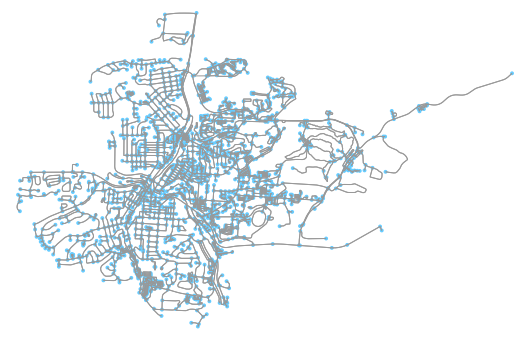

In [5]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='bike')
fig, ax = ox.plot_graph(G)

### Size of area in square meter

In [26]:
G_proj = ox.project_graph(G)
#nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
#graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

31710800.3787863

### Network Circuity 

In [14]:
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])

1.102445616196516


### Number of edges in the graph

In [22]:
edges = ox.basic_stats(G)
print(edges['m'])

{'n': 991, 'm': 2561, 'k_avg': 5.1685166498486375, 'intersection_count': 742, 'streets_per_node_avg': 2.6337033299697277, 'streets_per_node_counts': {0: 0, 1: 249, 2: 0, 3: 607, 4: 135}, 'streets_per_node_proportion': {0: 0.0, 1: 0.2512613521695257, 2: 0.0, 3: 0.6125126135216953, 4: 0.136226034308779}, 'edge_length_total': 354032.5429999999, 'edge_length_avg': 138.2399621241702, 'street_length_total': 182941.95, 'street_length_avg': 138.90808656036447, 'street_segments_count': 1317, 'node_density_km': None, 'intersection_density_km': None, 'edge_density_km': None, 'street_density_km': None, 'circuity_avg': 1.102445616196516, 'self_loop_proportion': 0.017180788754392814, 'clean_intersection_count': None, 'clean_intersection_density_km': None}


### Number of Nodes in the graph 

In [23]:
node = ox.basic_stats(G)
print(node['n'])

991


### Number of Intersection

In [25]:
inter = ox.basic_stats(G)
print(inter['intersection_count'])

742


### Average Street Length

In [28]:
st_avg = ox.basic_stats(G)
print(inter['street_length_avg'])

138.90808656036447


### Edge Length Total

In [29]:
edge_total= ox.basic_stats(G)
print(inter['edge_length_total'])

354032.5429999999


### Average Degree of Centrality

In [32]:
dc = ox.extended_stats(G)
print(dc['degree_centrality_avg'])

0.0052207238887359364


### Maximum Page Rank

In [41]:
pg = ox.extended_stats(G)
print(pg['pagerank_max'])

0.0029703753233060164


### Shortesth Path 

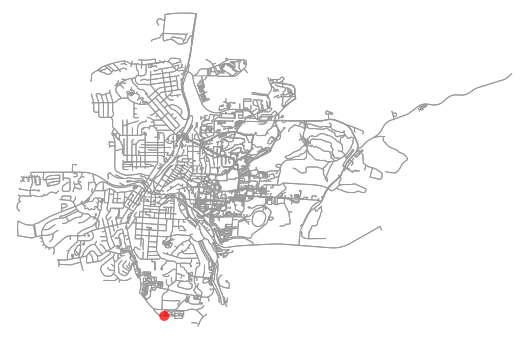

In [70]:
orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))
route = nx.shortest_path(G,orig_node,dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [18]:
sloan = ox.geocode('305 NE Spokane St, Pullman, WA 99163')
martin = ox.geocode('1775 NE Stadium Way, Pullman, WA 99164')

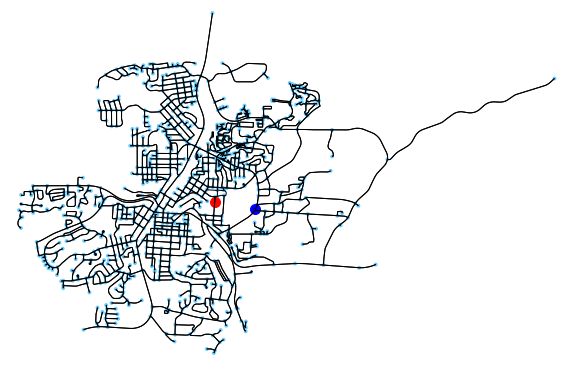

In [27]:
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10,show=False, close=False, edge_color='black')
ax.scatter(sloan[1], sloan[0], c='red', s=100)
ax.scatter(martin[1], martin[0], c='blue', s=100)

In [28]:
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,highway,osmid,x,y,geometry
5404041217,NaN,5404041217,-117.158,46.7268,POINT (-117.1579002 46.7267835)
5305735174,NaN,5305735174,-117.193,46.7263,POINT (-117.1934888 46.7262527)
5305735176,NaN,5305735176,-117.193,46.7267,POINT (-117.1932396 46.7266904)
5305735177,NaN,5305735177,-117.194,46.726,POINT (-117.1937233 46.7259536)
51501079,NaN,51501079,-117.148,46.7319,POINT (-117.1482828 46.7319308)


### Edge Centrality 

In [3]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

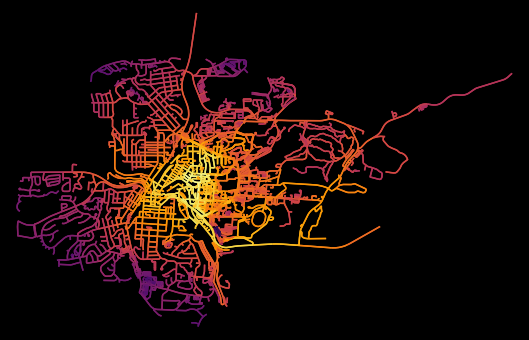

In [4]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

### Amenities in Pullman 

In [6]:
build = ox.buildings_from_place('Pullman')
print(type(build))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Restaurants in Pullman

In [7]:
restaurants = ox.pois_from_place('Pullman', amenities=['restaurant'])

In [8]:
len(restaurants)

33

In [9]:
restaurants.columns

Index(['addr:city', 'addr:housenumber', 'addr:postcode', 'addr:state',
       'addr:street', 'amenity', 'cuisine', 'delivery', 'element_type',
       'email', 'geometry', 'name', 'opening_hours', 'osmid', 'phone',
       'smoking', 'takeaway', 'toilets:wheelchair', 'wheelchair', 'building',
       'nodes', 'website'],
      dtype='object')

In [10]:
restaurants.head()

,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,cuisine,delivery,element_type,email,...,opening_hours,osmid,phone,smoking,takeaway,toilets:wheelchair,wheelchair,building,nodes,website
580151963,NaN,NaN,NaN,NaN,NaN,restaurant,pizza,NaN,node,NaN,...,NaN,580151963,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN
687172530,NaN,NaN,NaN,NaN,NaN,restaurant,steak_house,NaN,node,NaN,...,NaN,687172530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1707897405,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,1707897405,NaN,NaN,NaN,no,yes,NaN,NaN,NaN
2390203350,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,2390203350,509-332-1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501960477,NaN,NaN,NaN,NaN,NaN,restaurant,asian,NaN,node,NaN,...,NaN,2501960477,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN


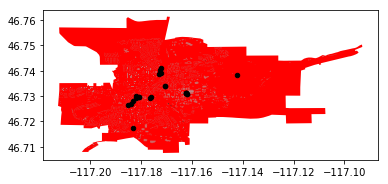

In [69]:
# Plot the footprint
ax = city.plot(facecolor='red')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
build.plot(ax=ax, facecolor='#BC8F8F', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='black', alpha=1, markersize=20)
#cm.tight_layout()

In [34]:
a = build['amenity']
a

37878353                  NaN
37878354                 bank
38114661               school
38115438               cinema
38117437                  NaN
39515214                  NaN
39515220                  NaN
39515222                  NaN
39515225                  NaN
39515228                  NaN
39515229                  NaN
39515232                  NaN
39515242                  NaN
39515250                  NaN
39515251                  NaN
39515252                  NaN
39515253                  NaN
39515254                  NaN
45519495              library
45521084                  NaN
45521112                  NaN
45521170                  NaN
62051184     place_of_worship
113843837                 NaN
134994113                 NaN
134994114                fuel
134994177                 NaN
165266635     public_building
165532451                 NaN
184461830                 NaN
184461832                 NaN
184461833                 NaN
184461861                 NaN
184798720 

### Fast Food Places in Pullman 

In [35]:
ff = ox.pois_from_place('Pullman', amenities=['fast_food'])

In [36]:
len(ff)

14

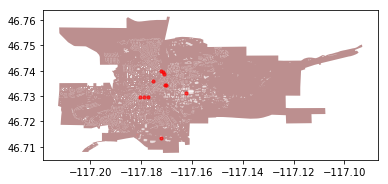

In [68]:
# Plot the footprint
ax = city.plot(facecolor='#BC8F8F')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
build.plot(ax=ax, facecolor='white', alpha=0.7)

# Plot restaurants
ff.plot(ax=ax, color='red', alpha=0.7, markersize=10)
#cm.tight_layout()

### Schools In Pullman 

In [46]:
school = ox.pois_from_place('Pullman', amenities=['school'])
school['geometry']

356543948                       POINT (-117.1879492 46.7223854)
6326579165                      POINT (-117.1946575 46.7493707)
38114661      POLYGON ((-117.171521 46.7178746, -117.1715124...
45525938      POLYGON ((-117.1813218 46.7252379, -117.181403...
261606397     POLYGON ((-117.1889908 46.7269077, -117.188993...
261606403     POLYGON ((-117.190658 46.7264257, -117.190658 ...
261608657     POLYGON ((-117.182547 46.7398678, -117.1825363...
261608665     POLYGON ((-117.1805889 46.741059, -117.1805835...
261630408     POLYGON ((-117.1786471 46.7187822, -117.178531...
261630413     POLYGON ((-117.179838 46.7191444, -117.1819065...
261631329     POLYGON ((-117.1813179 46.7246732, -117.180887...
261631342     POLYGON ((-117.1710671 46.7160293, -117.171174...
261723204     POLYGON ((-117.1865054 46.747396, -117.1862567...
261723207     POLYGON ((-117.1862031 46.7488524, -117.186017...
261723208     POLYGON ((-117.1869264 46.7486255, -117.186850...
261723220     POLYGON ((-117.1860992 46.

In [70]:
len(school)

18

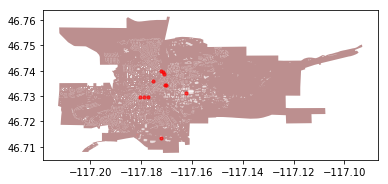

In [71]:
# Plot the footprint
ax = city.plot(facecolor='#BC8F8F')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
build.plot(ax=ax, facecolor='white', alpha=0.7)

# Plot restaurants
ff.plot(ax=ax, color='red', alpha=0.7, markersize=10)
#cm.tight_layout()

In [44]:
hos = ox.pois_from_place('Pullman', amenities=['hospital'])
pb

,amenity,building,element_type,geometry,name,nodes,osmid,source
165266635,public_building,yes,way,"POLYGON ((-117.1676424 46.7283393, -117.167650...",Commons,"[1768219577, 1768219580, 1768219579, 176821957...",165266635,local_knowledge
261637758,public_building,yes,way,"POLYGON ((-117.1744392 46.7228563, -117.174406...",NaN,"[2672437554, 2672437611, 2672437609, 267243739...",261637758,NaN
261637762,public_building,yes,way,"POLYGON ((-117.1758762 46.7229619, -117.175851...",NaN,"[2672437548, 2672437494, 2672437373, 267243746...",261637762,NaN
261637764,public_building,yes,way,"POLYGON ((-117.1766656 46.7227783, -117.176527...",NaN,"[2672437487, 2672437579, 2672437357, 267243756...",261637764,NaN
261637767,public_building,yes,way,"POLYGON ((-117.1747256 46.7227872, -117.174690...",NaN,"[2672437587, 2672437395, 2672437459, 267243745...",261637767,NaN
261723205,public_building,yes,way,"POLYGON ((-117.1823371 46.7456822, -117.182225...",NaN,"[2673204967, 2673204982, 2673205026, 267320475...",261723205,NaN
261784806,public_building,yes,way,"POLYGON ((-117.1843492 46.7198394, -117.184147...",NaN,"[2673994711, 2673994636, 2673994601, 267399463...",261784806,NaN
261938005,public_building,yes,way,"POLYGON ((-117.185491 46.7252716, -117.1851522...",NaN,"[2675657293, 2675657258, 2675657278, 267565725...",261938005,NaN


In [43]:
len(pb)

8